<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

*** “Где жить хорошо: 5 фишек разных стран” с диаграммами. ***

*Проанализируй эти данные, выдели для себя какие-то фишки и сделай наглядные диаграммы.*

Country - Страна

Cost of Living Index - Индекс стоимости жизни (Индексы стоимости жизни включают такие расходы, как питание, жилье, транспорт, энергия, одежда, здравоохранение и уход за детьми)

Rent Index - Индекс арендной платы

Cost of Living Plus Rent Index - Стоимость жизни плюс индекс арендной платы

Groceries Index - Индекс продовольственных товаров

Restaurant Price Index - Индекс цен в ресторанах 

Local Purchasing Power Index - Местный индекс покупательной способности (показывает, сколько товаров и услуг можно приобрести за единицу валюты)

**1. Предобработка данных**

In [1]:
# импортируем основные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(font_scale = 3,
        style = 'whitegrid',
        rc = {'figure.figsize':(20,7)}
       )

In [2]:
#считаем данные
data = pd.read_csv('test_cost_of_living_index_2022.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,2,Albania,35.5,8.47,22.83,29.32,25.82,30.19
3,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
4,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72


In [4]:
#переименуем колонки
data = data.rename(columns = {'Unnamed: 0' : 'rank', 'Unnamed: 1' : 'country', 'Unnamed: 2' : 'cost_of_living_index', 'Unnamed: 3' : 'rent_index', 'Unnamed: 4' : 'cost_of_living_plus_rent_index', 'Unnamed: 5' : 'groceries_index', 'Unnamed: 6' : 'restaurant_price_index', 'Unnamed: 7' : 'local_purchasing_power_index'})

In [5]:
#удалим лишнюю колонку с индексами
data = data.drop('rank', axis = 1)

In [6]:
#удалим лишнюю первую строку
data = data.drop (index=0)

In [7]:
data.head()

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,Albania,35.5,8.47,22.83,29.32,25.82,30.19
3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 1 to 139
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   country                         139 non-null    object
 1   cost_of_living_index            139 non-null    object
 2   rent_index                      139 non-null    object
 3   cost_of_living_plus_rent_index  139 non-null    object
 4   groceries_index                 139 non-null    object
 5   restaurant_price_index          139 non-null    object
 6   local_purchasing_power_index    139 non-null    object
dtypes: object(7)
memory usage: 7.7+ KB


**Имеем данные без пропусков. 139 стран. Изменим тип данных в колонках с цифрами на float**

In [9]:
data.cost_of_living_index = data.cost_of_living_index.astype(float)
data.rent_index = data.rent_index.astype(float)
data.cost_of_living_plus_rent_index = data.cost_of_living_plus_rent_index.astype(float)
data.groceries_index = data.groceries_index.astype(float)
data.restaurant_price_index = data.restaurant_price_index.astype(float)
data.local_purchasing_power_index = data.local_purchasing_power_index.astype(float)

Country - Страна

Cost of Living Index - Индекс стоимости жизни (Индексы стоимости жизни включают такие расходы, как питание, жилье, транспорт, энергия, одежда, здравоохранение и уход за детьми)

Rent Index - Индекс арендной платы

Cost of Living Plus Rent Index - Стоимость жизни плюс индекс арендной платы

Groceries Index - Индекс продовольственных товаров

Restaurant Price Index - Индекс цен в ресторанах 

Local Purchasing Power Index - Местный индекс покупательной способности (показывает, сколько товаров и услуг можно приобрести за единицу валюты)

К сожалению мы не можем выявить динамику по отдельным странам или регионам, так как у нас нет данных за какой-то временной период.
Также мы не знаем, есть ли разница в расчетах в отдельных регионах. Будем считать расчет индекса по данным из открытых источников:
Как рассчитывается индекс
Изначально все индексы относятся к Нью-Йорку (США). Это означает, что для Нью-Йорка каждый индекс должен быть равен 100 (%). Если в другом городе индекс арендной платы, например, равен 120, это означает, что в среднем в этом городе арендная плата на 20% дороже, чем в Нью-Йорке. Если индекс арендной платы в городе равен 70, это означает, что в среднем арендная плата в этом городе на 30% дешевле, чем в Нью-Йорке.
https://gogov.ru/articles/cost-of-living


Для начала рассмотрим индекс стоимости жизни, который оценивает уровень изменения цен на товары и услуги.

Что такое стоимость жизни?
Стоимость жизни - это сумма денег, необходимая для покрытия основных расходов, таких как жилье, питание, налоги и здравоохранение в определенном месте и периоде времени. Стоимость жизни часто используется для сравнения того, насколько дорого жить в одном городе по сравнению с другим. Стоимость жизни привязана к заработной плате. Если расходы в каком-либо городе, таком, например, как Нью-Йорк, выше, уровень заработной платы должен быть выше, чтобы люди могли позволить себе жить в этом городе.


**Первое, что нам необходимо помнить, что нас интересуют самые низкие индексы, кроме индекса Local Purchasing Power Index(Местный индекс покупательной способности). Он покажет качество жизни местного населения и будет здорово, если он высокий.**

**В проекте пойдем по пути того, что рассмотрим топ-5каждого индекса. А также рассмотрим корреляцию между показателями и сформируем выборку, отбросив крайние значения в виде 25 и 75 перцентилей. Далее сформируем на основании наших небольших данных небольшие рейтинги:**
    
    
    1. Рейтинг "путешественника, которому ничего не страшно и надо дешево" (с учетом индекса арендной платы и цен в ресторанах)
    2. Рейтинг стран для luxury путешествия (с высоким местным индексом покупательской способности)
    3. Рейтинг balance путешествия (средний индекс уровня жизни в государстве и средние индексы арендной платы и цен в ресторанах)
    4. Наилучший индекс покупательной способности (=уровень жизни) по частям света на основании ТОП-10 стран


In [10]:
#Начнем с общего обзора - гистограмм всех числовых столбцов

In [11]:
#оценим гистограммы для всех числовых столбцов
#data.hist(figsize=(15,25),bins=100,range=(20,100))
#sns.despine() #убираем лишние надписи с графика

**2. Индекс стоимости жизни**

In [12]:
#Индекс стоимости жизни (CPI) — это статистический показатель, который оценивает уровень изменения цен на товары и услуги
#в определенном регионе в сравнении с базовым периодом.

data.cost_of_living_index.sort_values().head()

93    19.92
1     20.37
53    24.43
27    26.72
3     26.87
Name: cost_of_living_index, dtype: float64

In [13]:
cost_of_living_index = data.loc[[93,1,53,27,3]]
cost_of_living_index

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
53,India,24.43,5.30,15.47,26.43,17.56,49.72
27,Colombia,26.72,8.18,18.03,23.47,19.44,28.85
3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63


Text(0.5, 1.0, 'Топ-5 стран с лучшим индексом стоимости жизни\n')

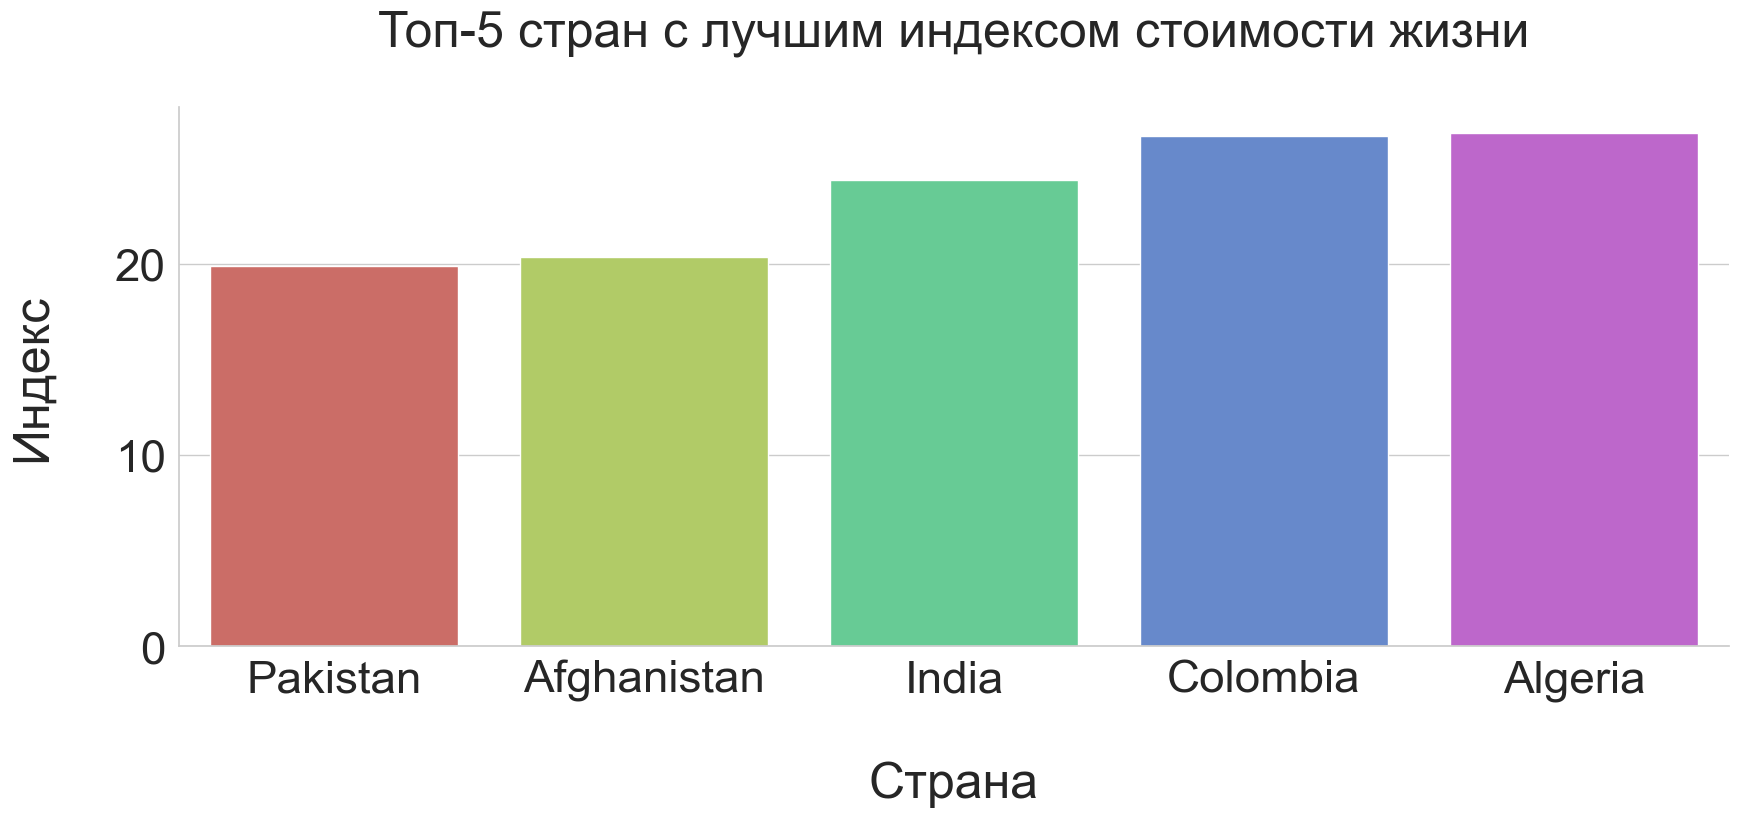

In [14]:
sns.barplot(data = cost_of_living_index, x = 'country', y = 'cost_of_living_index', palette='hls')
sns.despine()
plt.ylabel('Индекс\n')
plt.xlabel('\nСтрана')
plt.title('Топ-5 стран с лучшим индексом стоимости жизни\n')

**Вывод: По наименьшему индексу стоимости жизни лидируют страны Азии: Пакистан, Афганистан, Индия. Далее идут Колумбия и Алжир.**

**3. Далее рассмотрим индекс арендной платы**

В общем рейтинге Numbeo индекс стоимости жизни считается относительно Нью-Йорка. Это означает, что для Нью-Йорка каждый индекс должен быть 100 (%). Если другой город имеет, например, индекс арендной платы 120, это означает, что в среднем в этом городе арендная плата на 20% дороже, чем в Нью-Йорке. Если город имеет индекс арендной платы 70, это означает, что в среднем в этом городе арендная плата на 30% дешевле, чем в Нью-Йорке.

https://alexstaff.agency/ru/reiting

In [15]:
data.rent_index.sort_values().head()

1     2.72
93    3.91
85    3.96
11    4.42
3     4.59
Name: rent_index, dtype: float64

In [16]:
rent_index = data.loc[[1,93,85,11,3]]
rent_index

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
85,Nepal,28.29,3.96,16.89,26.45,20.41,22.96
11,Bangladesh,33.13,4.42,19.67,30.41,21.70,25.30
3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63


**Вывод: три из пяти стран совпадают с предыдущими подсчетами - Афганистан, Пакистан, Алжир. Добавились Бангладеш и Непал.**
**Именно в этих странах самый низкий индекс арендной платы.**

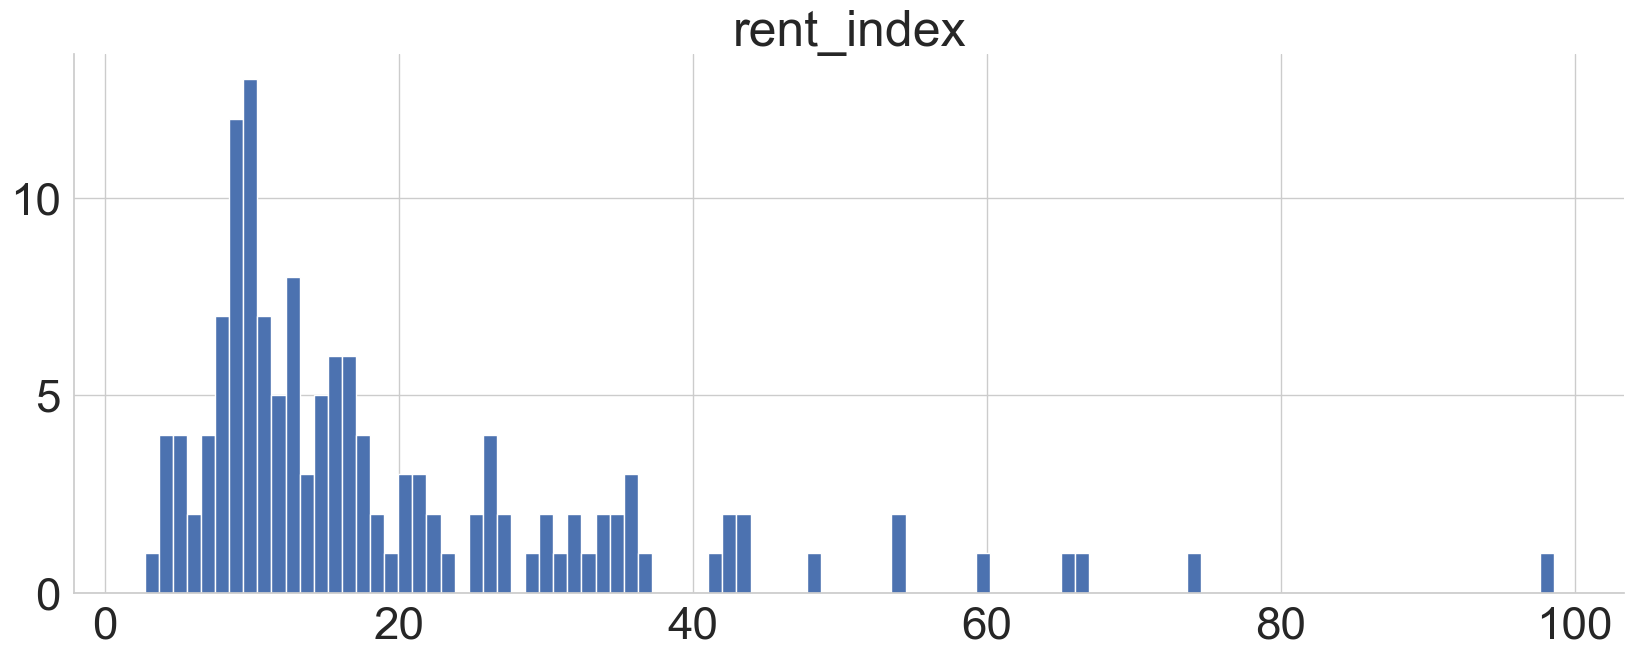

In [17]:
data.hist('rent_index',bins=100)
sns.despine()

<AxesSubplot:>

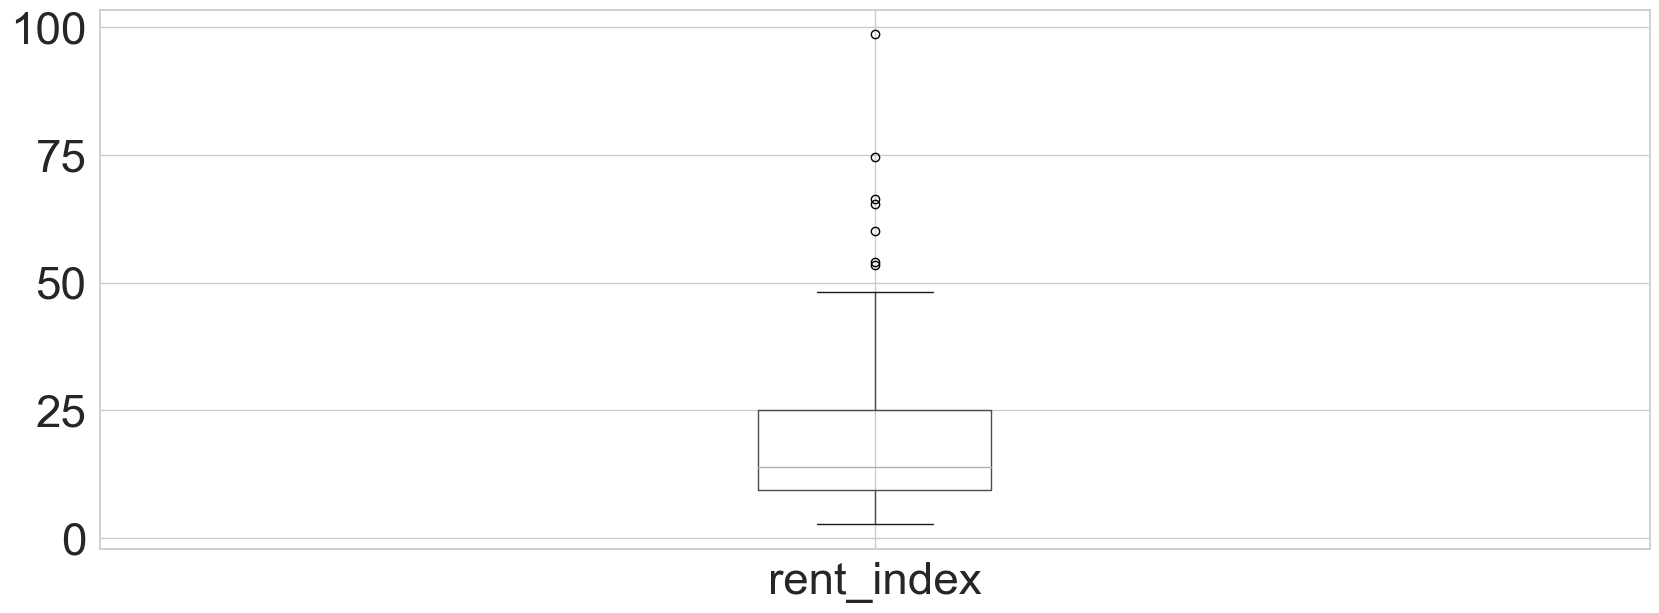

In [18]:
data.boxplot('rent_index')

**Вывод: Основная масса стран имеет индекс до 25**

**Но все же наш топ-5 - это уникумы, которых меньшинство.**

In [19]:
data.rent_index.describe()

count    139.000000
mean      19.291511
std       15.317726
min        2.720000
25%        9.515000
50%       13.930000
75%       25.070000
max       98.580000
Name: rent_index, dtype: float64

**4. Далее рассмотрим индекс стоимости жизни вместе с индексом арендной платы.**

Как рассчитывается индекс арендной платы.
Изначально все индексы относятся к Нью-Йорку (США). Это означает, что для Нью-Йорка каждый индекс должен быть равен 100 (%). Если в другом городе индекс арендной платы, например, равен 120, это означает, что в среднем в этом городе арендная плата на 20% дороже, чем в Нью-Йорке. Если индекс арендной платы в городе равен 70, это означает, что в среднем арендная плата в этом городе на 30% дешевле, чем в Нью-Йорке.
https://gogov.ru/articles/cost-of-living

In [20]:
data.cost_of_living_plus_rent_index.sort_values().head()

1     12.09
93    12.42
53    15.47
3     16.43
85    16.89
Name: cost_of_living_plus_rent_index, dtype: float64

In [21]:
cost_of_living_plus_rent_index = data.loc[[1,93,53,3,85]]
cost_of_living_plus_rent_index

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
53,India,24.43,5.30,15.47,26.43,17.56,49.72
3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
85,Nepal,28.29,3.96,16.89,26.45,20.41,22.96


**Вывод: Афганистан, Пакистан, Индия, Алжир снова попадают в список. Кто добавился? Непал, который сменил Колумбию. Снова в топ-индексах лидирует Азия.**

Text(0.5, 1.0, 'Лучший индекс стоимости жизни + индекс арендной платы\n Топ-5 стран')

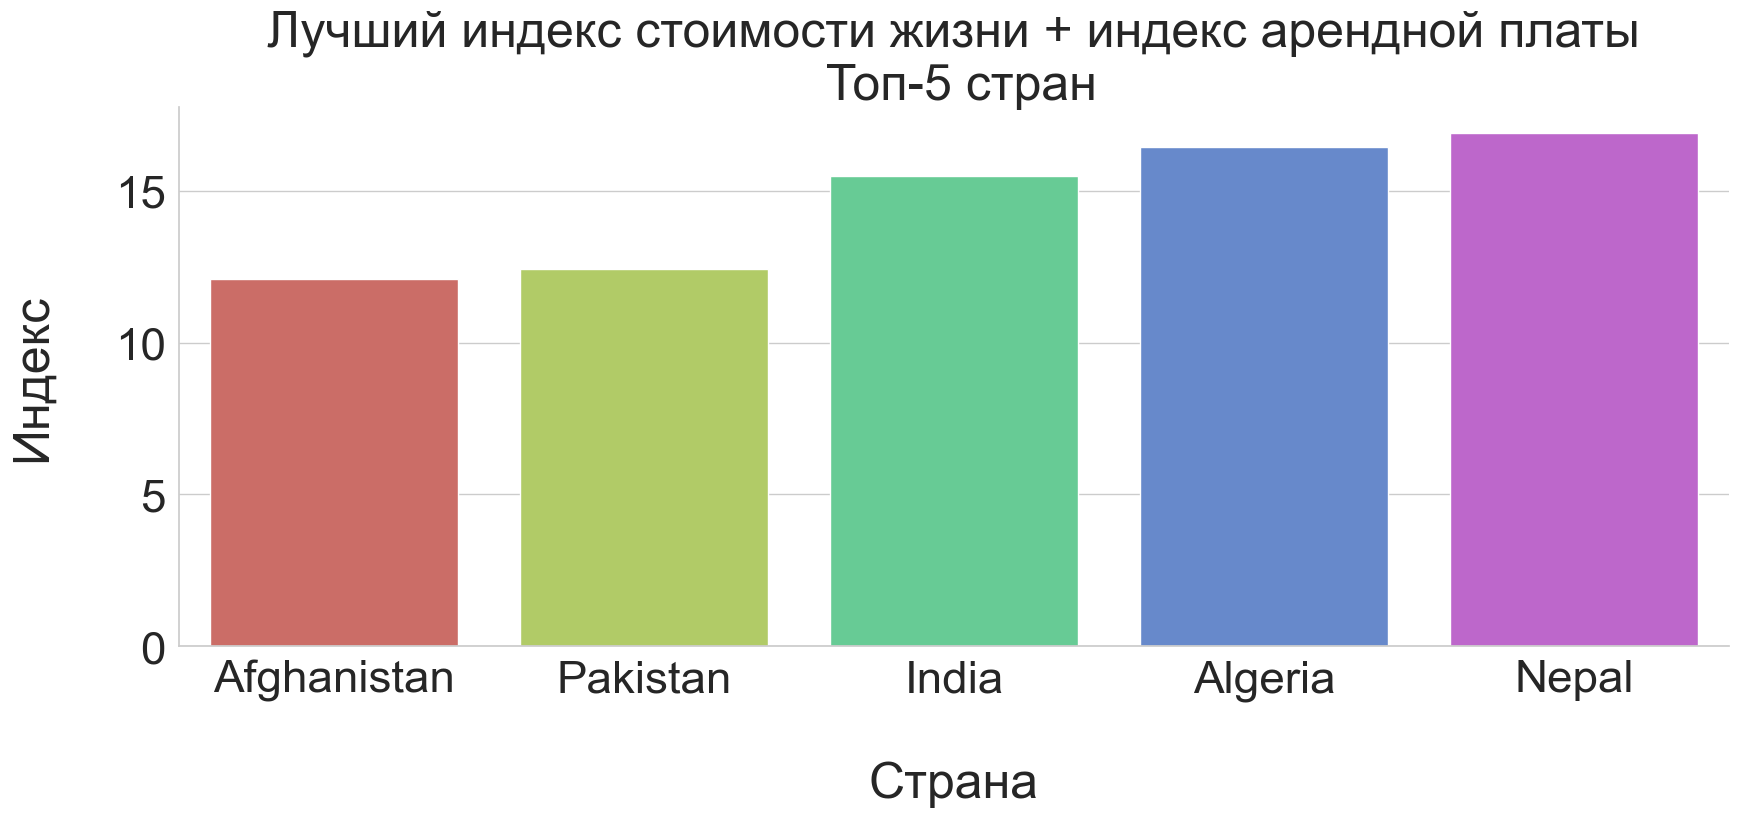

In [22]:
sns.barplot(data = cost_of_living_plus_rent_index, x = 'country', y = 'cost_of_living_plus_rent_index', palette='hls', order=['Afghanistan','Pakistan','India','Algeria','Nepal'])
sns.despine()
plt.ylabel('Индекс\n')
plt.xlabel('\nСтрана')
plt.title('Лучший индекс стоимости жизни + индекс арендной платы\n Топ-5 стран')

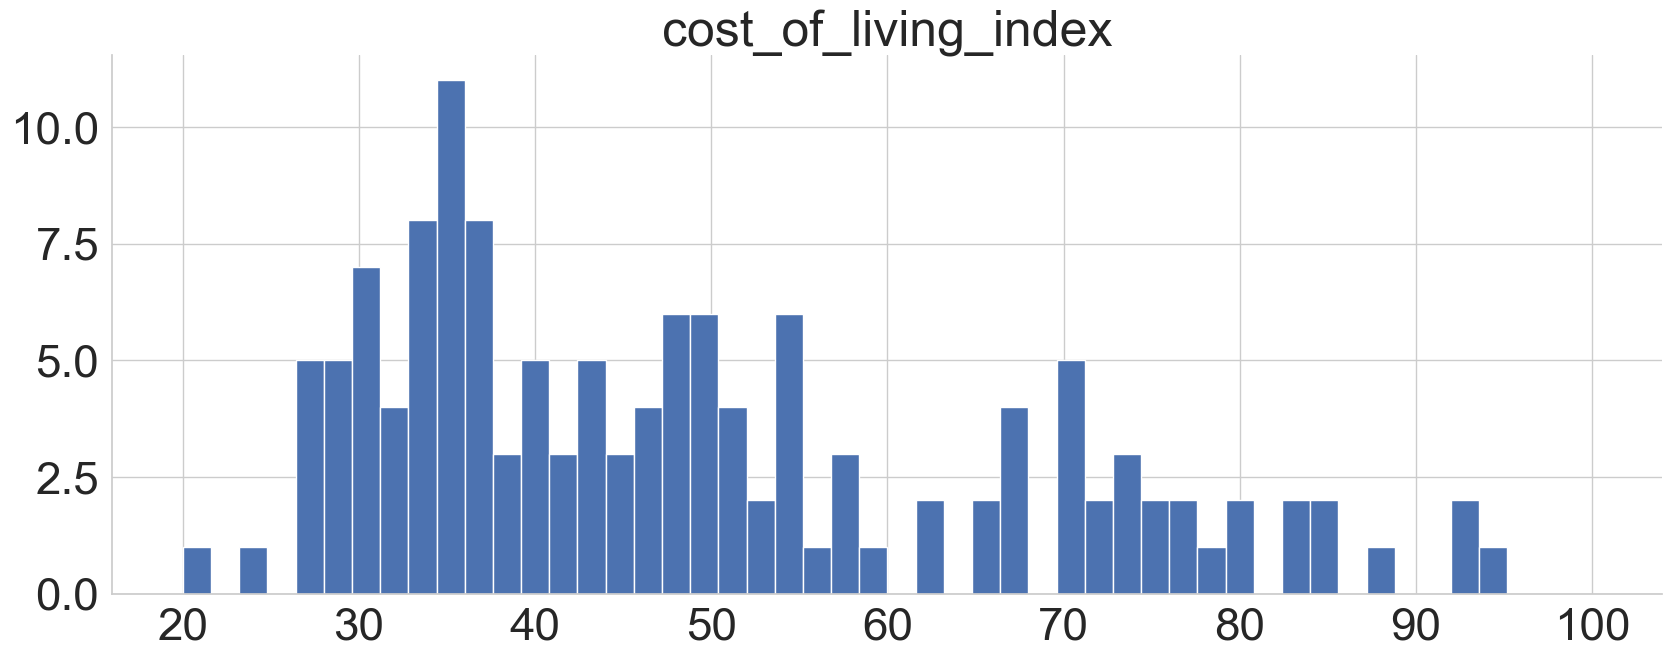

In [23]:
data.hist('cost_of_living_index',bins=50, range=(20,100))
sns.despine()

**Вывод: видим, что стран с таким низким индексом, как и с очень высоким, довольно мало**

**5. Рассмотрим индекс продовольственных товаров - groceries_index**

Индекс потребительских цен (ИПЦ) применяется в экономике для исследования изменения цен за период. Индексов цен существует несколько видов, при использовании ИПЦ применяется индекс Ласпейреса. Широкое распространение этого показателя в экономических расчетах обусловлено тем, что ИПЦ используется во многих странах для оценки темпа инфляции и качества жизни.

Материал взят с сайта Студворк https://studwork.ru/spravochnik/ekonomika/formuly-po-ekonomike/indeks-potrebitelskih-cen

In [24]:
data.groceries_index.sort_values()

1       14.92
93      17.81
127     22.64
27      23.47
67      24.84
        ...  
52      90.22
115     91.95
91      97.31
120    128.13
16     148.66
Name: groceries_index, Length: 139, dtype: float64

In [25]:
groceries_index = data.loc[[1,93,127,27,67]]
groceries_index

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
127,Turkey,28.31,6.63,18.15,22.64,18.40,32.88
27,Colombia,26.72,8.18,18.03,23.47,19.44,28.85
67,Kosovo (Disputed Territory),27.05,8.04,18.14,24.84,19.53,43.86


**Снова видим Афганистан и Пакистан. А также Турцию, Колумбию, Косово.**

**Значение ИПЦ выражается в процентах, которые показывают, насколько изменилась стоимость определённого набора товаров и услуг по сравнению с базисным периодом. Бермуды более чем вдвое превышают этот показатель среди наименьших индексов наших данных.**

Text(0.5, 1.0, 'Лучший индекс потребительских цен\n Топ-5 стран\n')

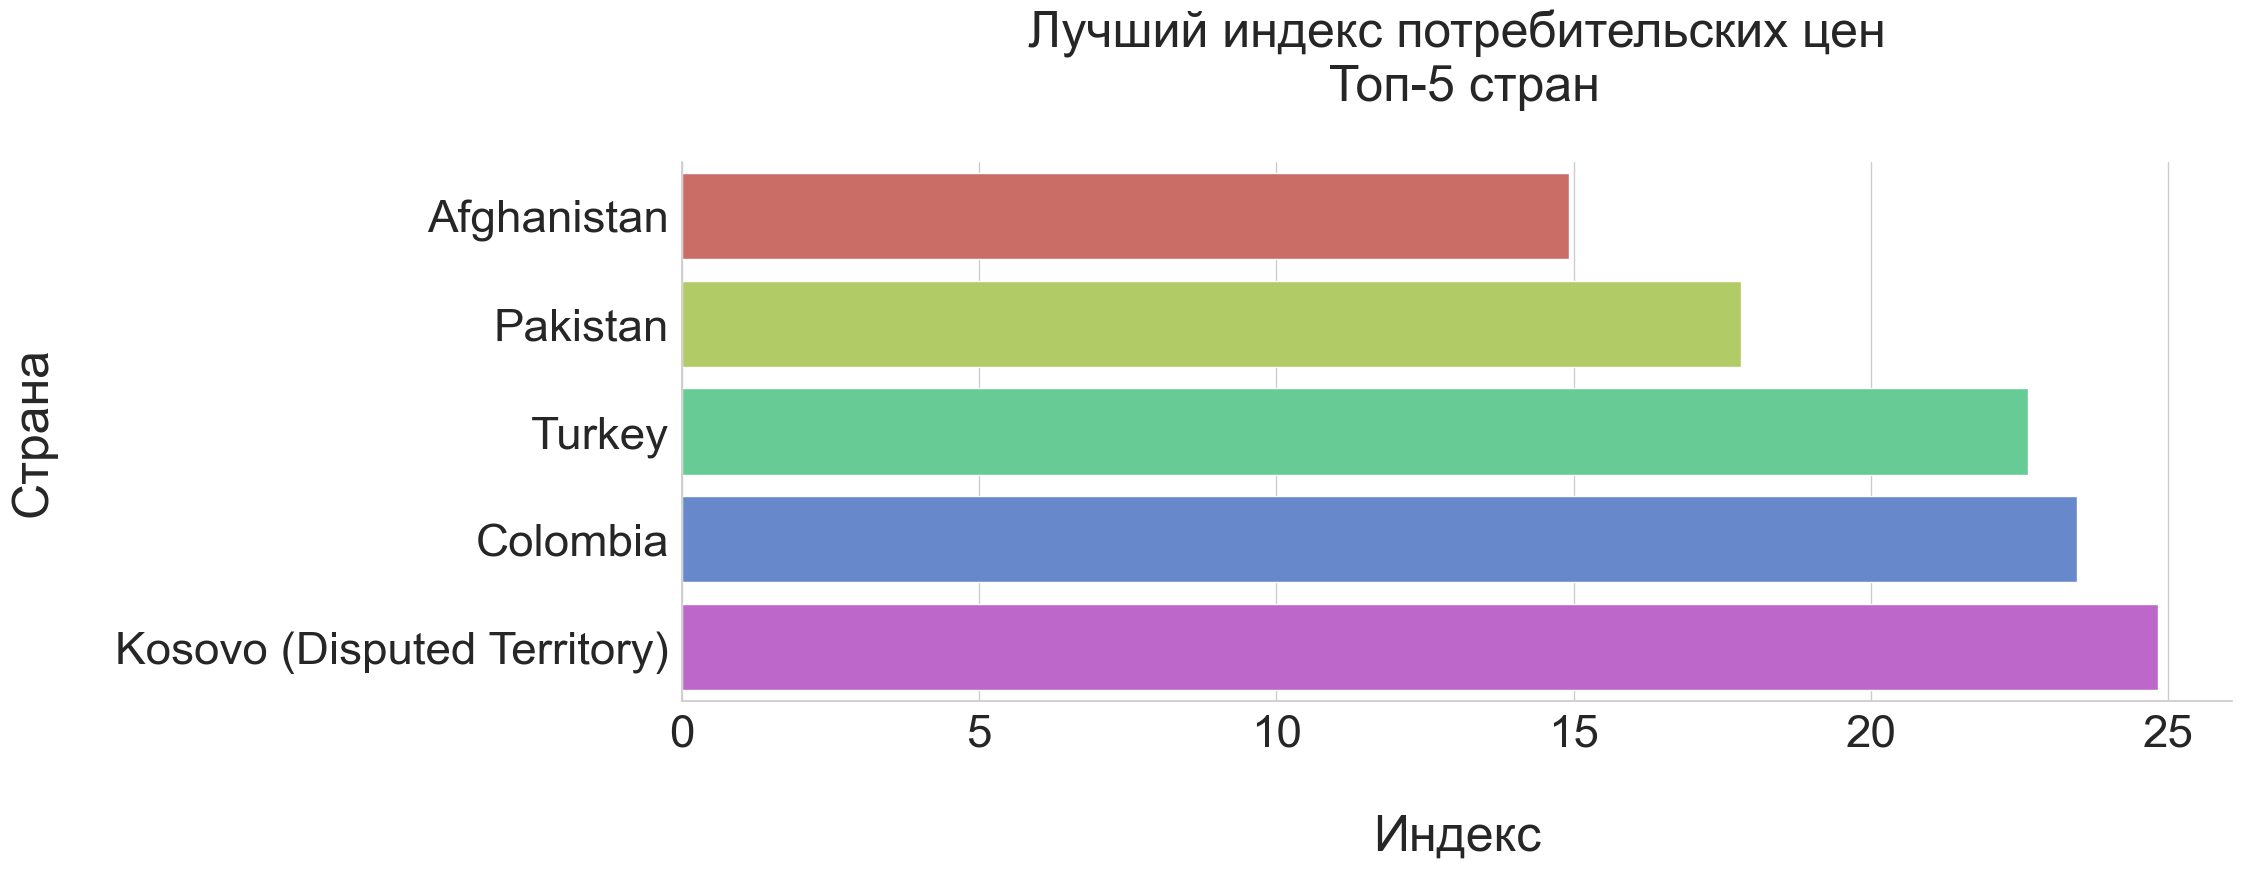

In [26]:
sns.barplot(data = groceries_index, y = 'country', x = 'groceries_index', palette='hls')
sns.despine()
plt.xlabel('\nИндекс')
plt.ylabel('Страна\n')
plt.title('Лучший индекс потребительских цен\n Топ-5 стран\n')

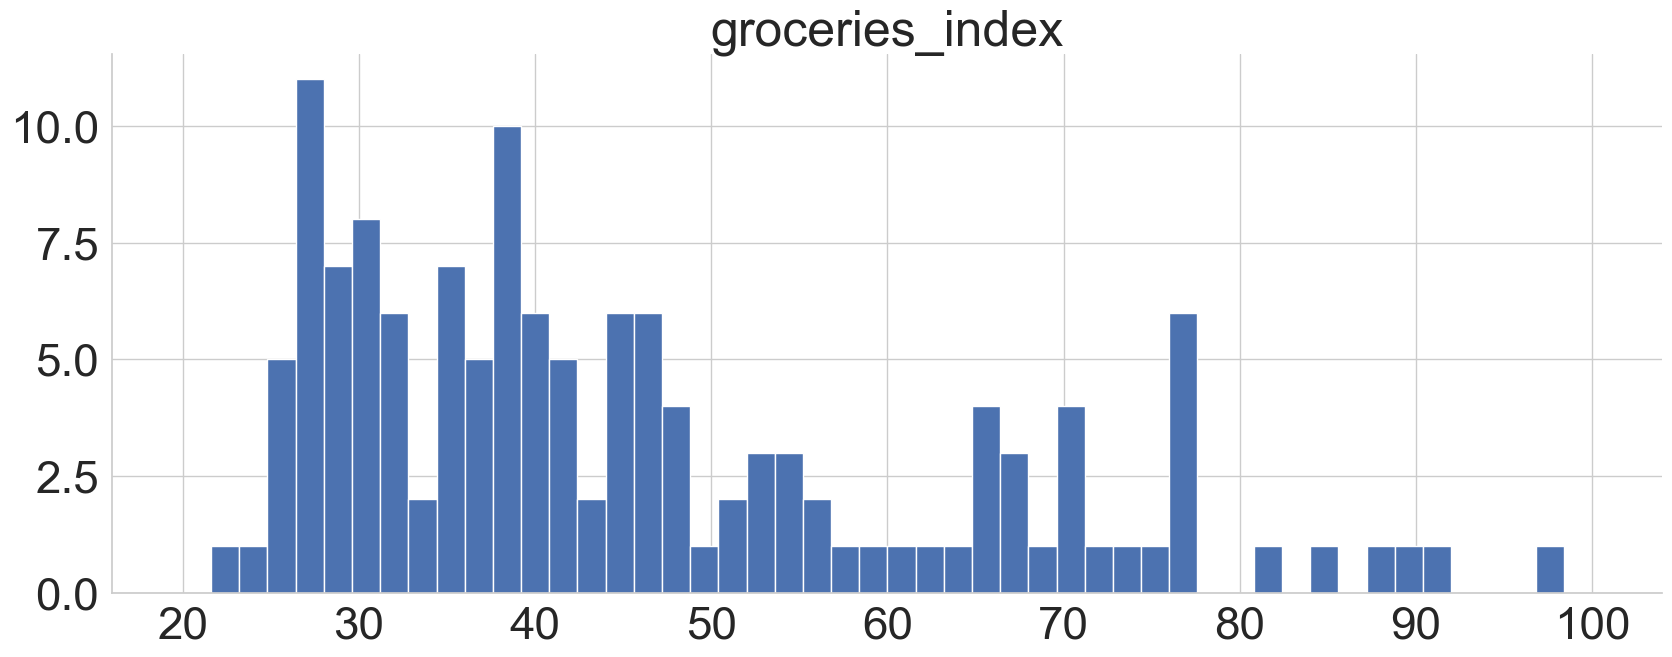

In [27]:
data.hist('groceries_index',bins=50, range=(20,100))
sns.despine()

**Вывод: опять же видим, что стран с таким низким индексом, как и с очень высоким, довольно мало**

**6. Индекс цен в ресторанах - restaurant_price_index**

In [28]:
data.restaurant_price_index.sort_values().head()

1      12.41
3      14.48
93     15.54
126    15.96
117    17.27
Name: restaurant_price_index, dtype: float64

In [29]:
restaurant_price_index = data.loc[[1,3,93,126,117]]
restaurant_price_index

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
126,Tunisia,27.87,5.32,17.30,27.36,15.96,27.83
117,Sri Lanka,31.29,8.23,20.48,37.67,17.27,19.27


**Индекс цен в ресторанах выражается в процентном соотношении. Мы видим снова Афганистан, Аржир, Пакистан. Добавились к списку Тунис (Африка) и Шри Ланка(Азия)**

In [30]:
restaurant_price_index['part_of_the_world'] = restaurant_price_index['country'].replace(['Afghanistan', 'Algeria', 'Pakistan', 'Tunisia', 'Sri Lanka'], ['Азия', 'Африка', 'Азия', 'Африка', 'Азия'])
restaurant_price_index

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,part_of_the_world
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04,Азия
3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63,Африка
93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63,Азия
126,Tunisia,27.87,5.32,17.30,27.36,15.96,27.83,Африка
117,Sri Lanka,31.29,8.23,20.48,37.67,17.27,19.27,Азия


Text(0.5, 1.0, 'Лучший индекс ресторанных цен\n Топ-5 стран\n')

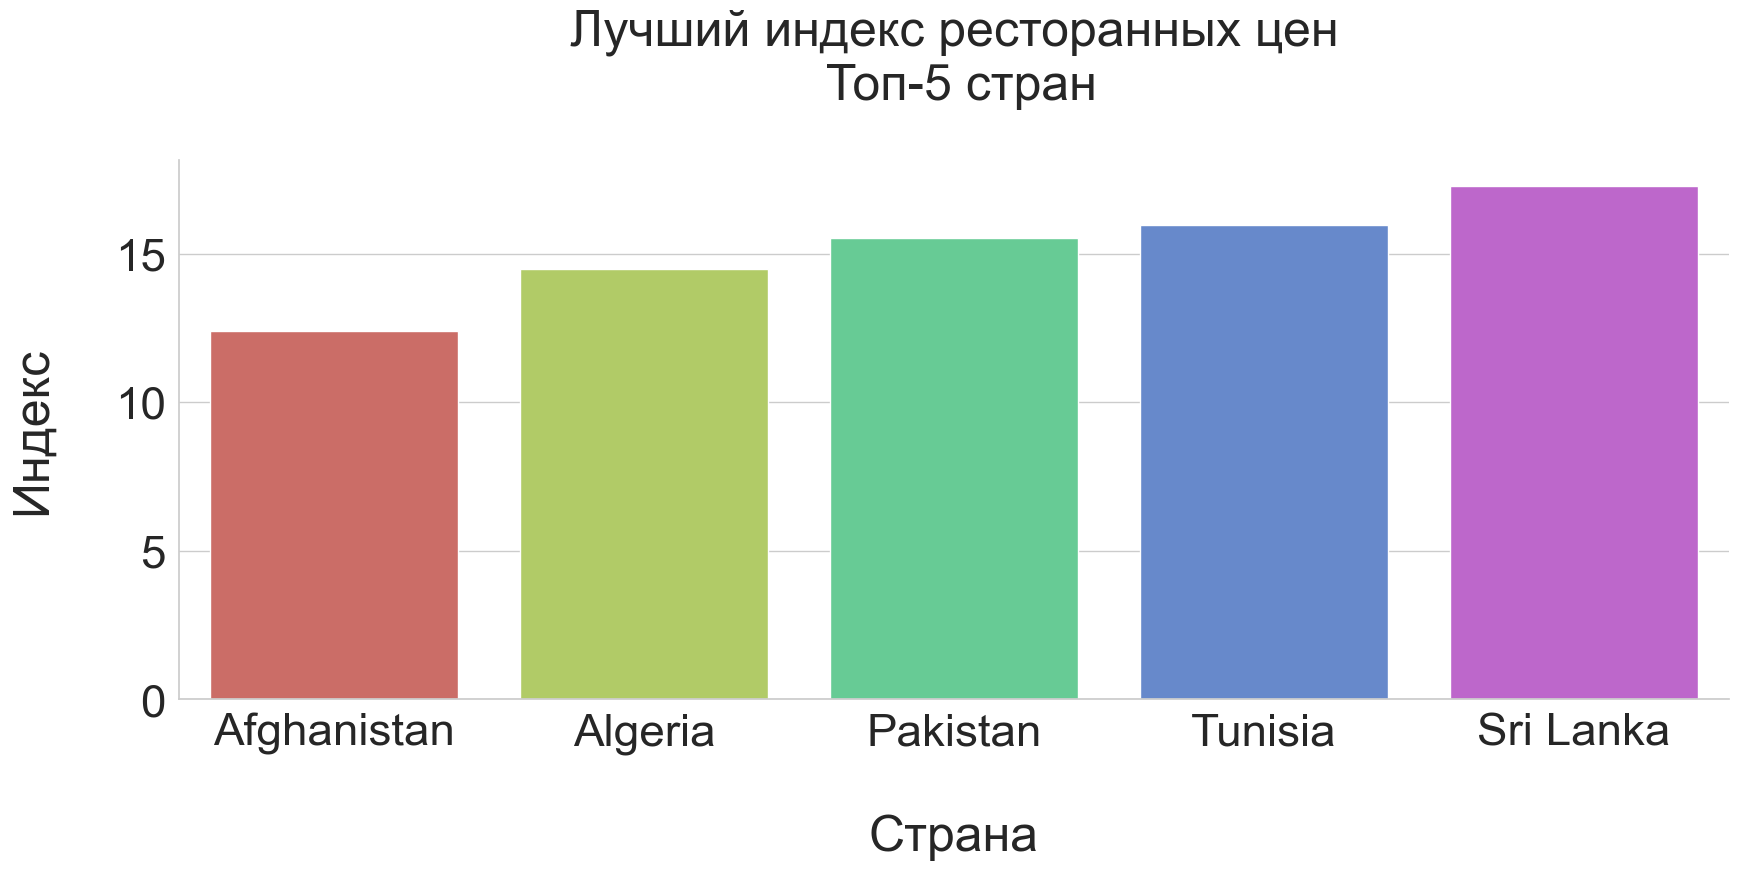

In [31]:
sns.barplot(data = restaurant_price_index, x = 'country', y = 'restaurant_price_index', palette='hls')
sns.despine()
plt.xlabel('\nСтрана')
plt.ylabel('Индекс\n')
plt.title('Лучший индекс ресторанных цен\n Топ-5 стран\n')

**7.Local Purchasing Power Index - Местный индекс покупательной способности.**
**ЧЕМ ВЫШЕ - ТЕМ ЛУЧШЕ!**

Местная покупательная способность показывает относительную покупательную способность при покупке товаров и услуг в данном городе для средней заработной платы в этом городе. Если внутренняя покупательская способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой.

In [32]:
#Посмотрим на десятку лучших стран
data.local_purchasing_power_index.sort_values(ascending = False).head(10)

120    118.44
132    106.34
6      104.63
44     103.08
33      99.45
73      98.84
119     98.14
102     93.67
130     92.17
106     91.85
Name: local_purchasing_power_index, dtype: float64

In [33]:
local_purchasing_power_index_10 = data.loc[[120,132,6,44,33,73,119,102,130,106]]
local_purchasing_power_index_10

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
132,United States,70.13,42.07,56.98,70.37,70.07,106.34
6,Australia,77.75,36.84,58.57,77.44,72.95,104.63
44,Germany,65.58,27.62,47.78,52.31,60.91,103.08
33,Denmark,84.12,33.23,60.26,68.60,98.75,99.45
73,Luxembourg,80.50,60.09,70.93,74.75,88.79,98.84
119,Sweden,71.74,25.86,50.23,65.78,72.61,98.14
102,Qatar,62.81,48.20,55.96,54.97,63.01,93.67
130,United Arab Emirates,58.33,43.28,51.28,46.67,61.53,92.17
106,Saudi Arabia,50.41,11.67,32.25,42.57,35.50,91.85


C:\Users\1612918\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '\nСтрана света')

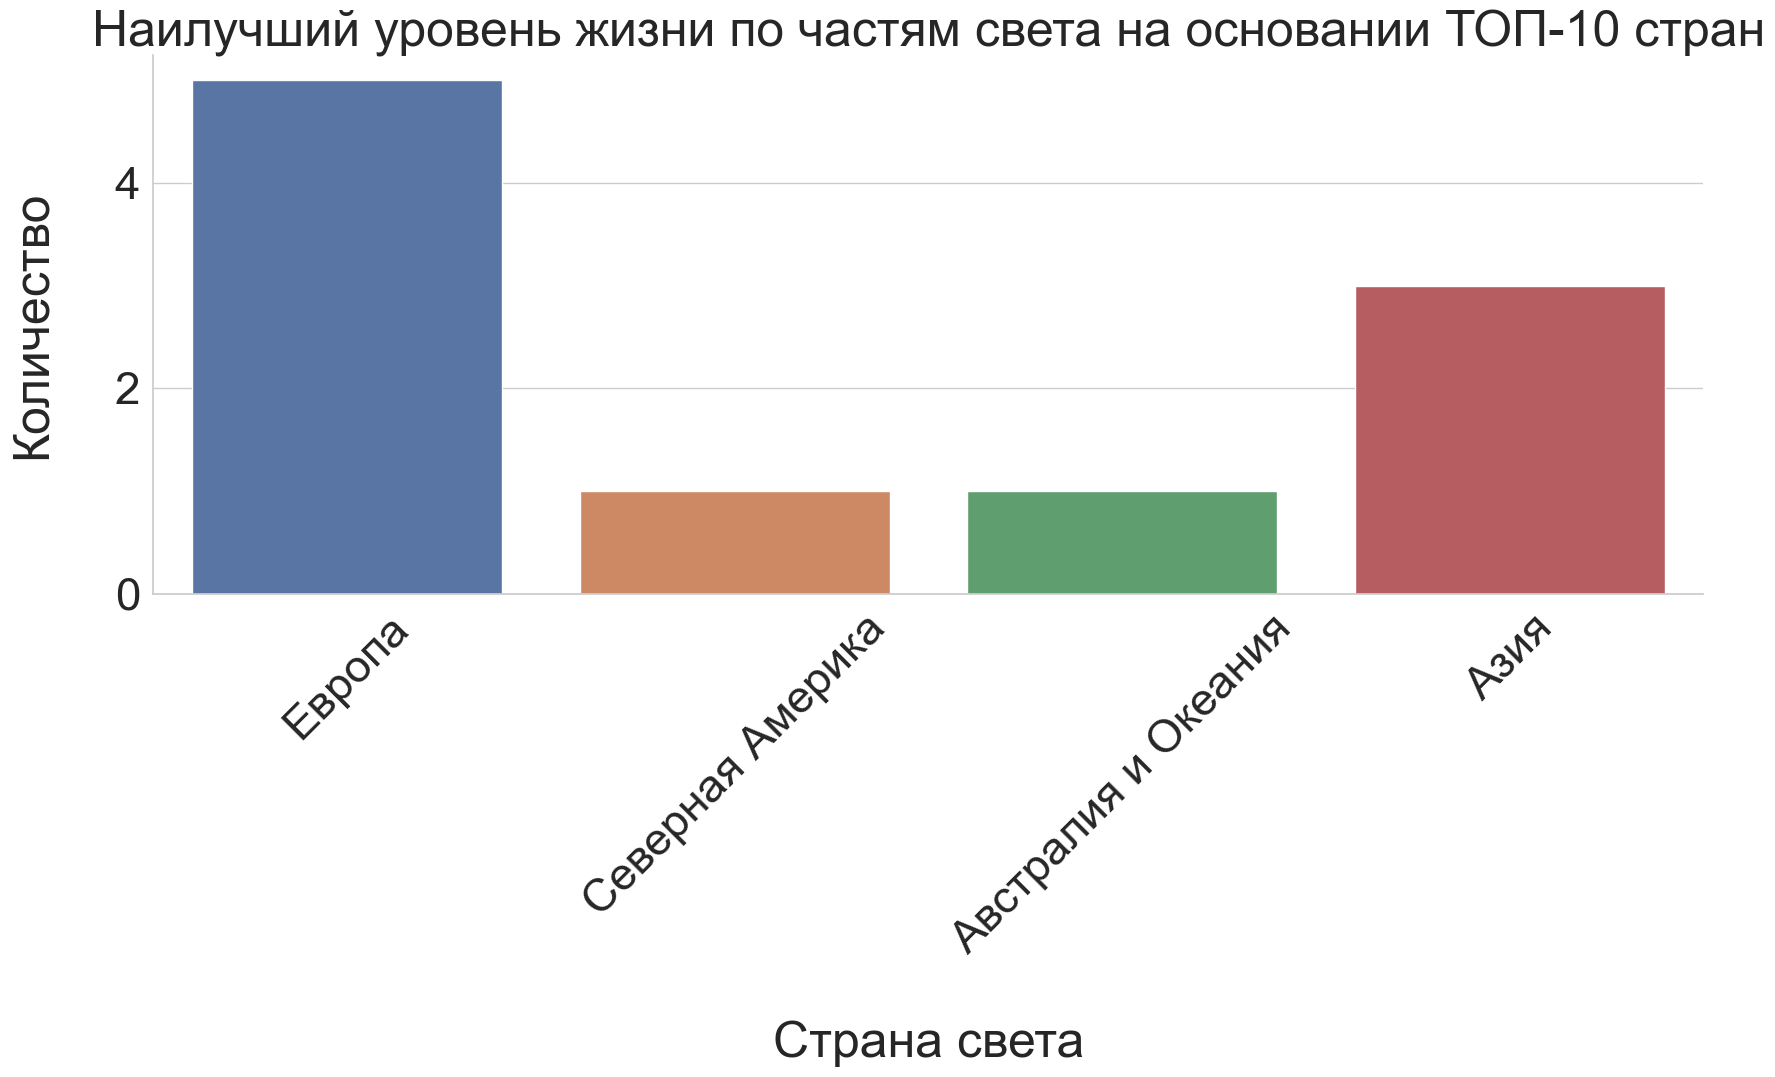

In [34]:
local_purchasing_power_index_10['part_of_the_world'] = local_purchasing_power_index_10['country'].replace(['Switzerland', 'United States', 'Australia', 'Germany', 'Denmark','Luxembourg', 'Sweden', 'Qatar', 'United Arab Emirates', 'Saudi Arabia'], ['Европа', 'Северная Америка', 'Австралия и Океания', 'Европа', 'Европа', 'Европа', 'Европа', 'Азия', 'Азия', 'Азия'])
sns.countplot(local_purchasing_power_index_10['part_of_the_world'])
plt.xticks(rotation=45)
sns.despine()
plt.title('Наилучший уровень жизни по частям света на основании ТОП-10 стран')
plt.ylabel('Количество\n')
plt.xlabel('\nСтрана света')

In [35]:
#Первая пятерка лучших стран с высоким индексом покупательной способности
local_purchasing_power_index = data.loc[[120,132,6,44,33]]
local_purchasing_power_index['part_of_the_world'] = local_purchasing_power_index['country'].replace(['Switzerland', 'United States', 'Australia', 'Germany', 'Denmark'], ['Европа', 'Северная Америка', 'Австралия и Океания', 'Европа', 'Европа'])
local_purchasing_power_index

,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,part_of_the_world
120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44,Европа
132,United States,70.13,42.07,56.98,70.37,70.07,106.34,Северная Америка
6,Australia,77.75,36.84,58.57,77.44,72.95,104.63,Австралия и Океания
44,Germany,65.58,27.62,47.78,52.31,60.91,103.08,Европа
33,Denmark,84.12,33.23,60.26,68.60,98.75,99.45,Европа


**Швейцария, США, Австралия, Германия, Дания! Европа стала лидером по местному индексу покупательной способности.**

Text(0.5, 1.0, 'Рейтинг стран для luxury путешествия\n')

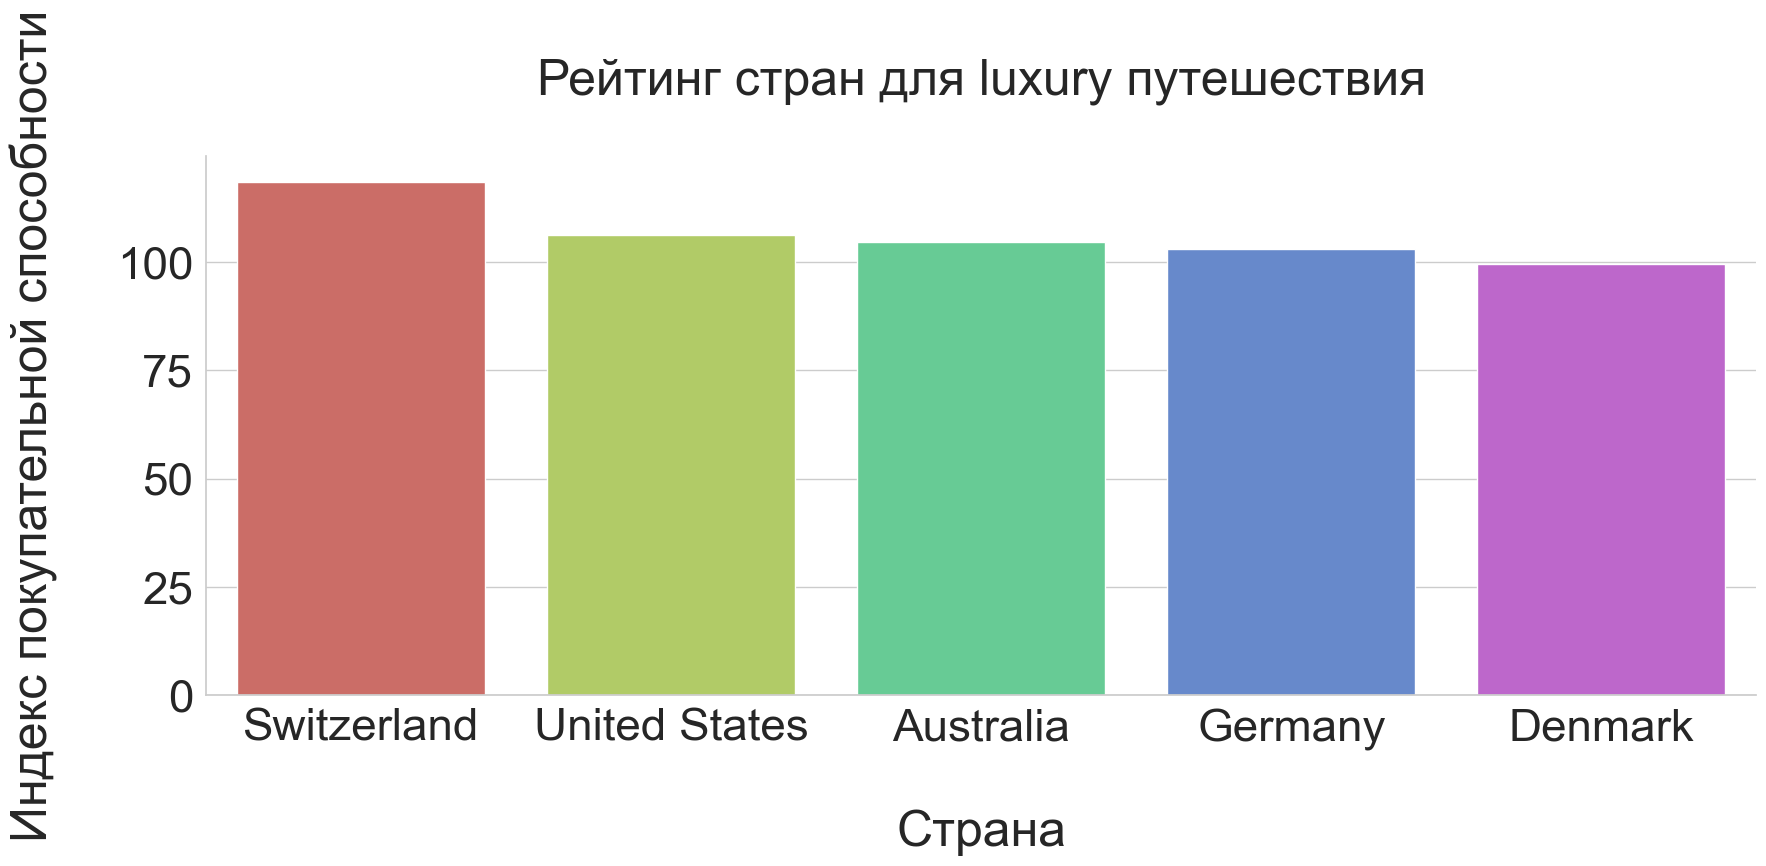

In [36]:
sns.barplot(data = local_purchasing_power_index, x = 'country', y = 'local_purchasing_power_index', palette='hls')
sns.despine()
plt.xlabel('\nСтрана')
plt.ylabel('Индекс покупательной способности\n')
plt.title('Рейтинг стран для luxury путешествия\n')

**Вывод: видим, что в индексе покупательной способности и близко нет стран с лучшими индексами стоимости жизни, арендной платы и прочими. Отдых там сколь дорог, столь и приятен в плане общего достатка граждан государства**

**8.Рейтинг для иммиграции**

**На основании наших небольших данных учтем два индекса: высокий индекс покупательской способности и низкий индекс стоимости жизни.**

Text(0.5, 1.0, 'Положительная корреляция стоимости жизни и покупательной способности\n')

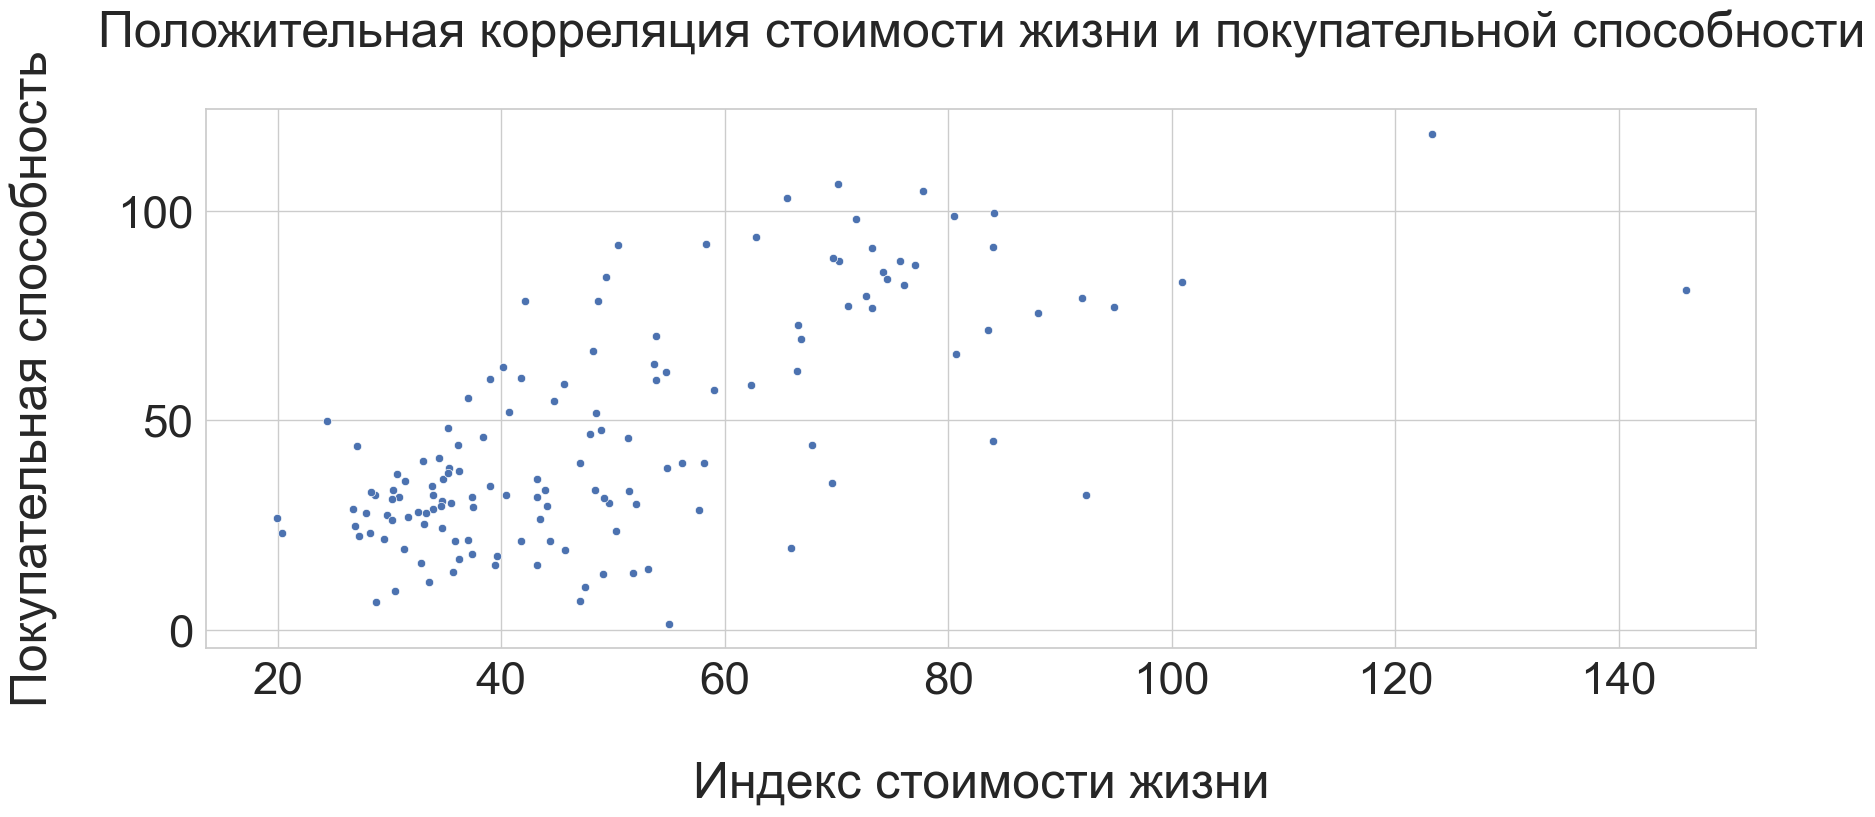

In [37]:
#Отразим на диаграмме рассеяния соотношение этих индексов
sns.scatterplot(data = data, x = 'cost_of_living_index', y = 'local_purchasing_power_index')
plt.xlabel('\nИндекс стоимости жизни')
plt.ylabel('Покупательная способность\n')
plt.title('Положительная корреляция стоимости жизни и покупательной способности\n')

**Вывод: в данной диаграмме мы наблюдаем положительную корреляции индексов: чем выше стоимость жизни, тем выше покупательсткая способность. Чтобы соблюсти баланс уровня жизни и дешевого пребывания в стране, для поиска нашего рейтинга иммиграции, проведем выборку и отбросим в данных 25 и 75 перцентили.**

In [38]:
data.cost_of_living_index.describe()

count    139.000000
mean      50.188633
std       20.860222
min       19.920000
25%       34.715000
50%       44.680000
75%       62.580000
max      146.040000
Name: cost_of_living_index, dtype: float64

In [39]:
data.local_purchasing_power_index.describe()

count    139.000000
mean      46.426259
std       26.921840
min        1.450000
25%       27.040000
50%       37.220000
75%       66.105000
max      118.440000
Name: local_purchasing_power_index, dtype: float64

In [40]:
immigration = data.query('cost_of_living_index > 34.7 & cost_of_living_index < 62')
immigration = immigration.query('local_purchasing_power_index > 27 & local_purchasing_power_index < 66')
immigration = immigration[['country','local_purchasing_power_index','cost_of_living_index']]

#отсортируем данные: Покупательская способность по убыванию, стоимость жизни по возрастанию
#immigration = immigration.sort_values(by = ['cost_of_living_index','local_purchasing_power_index'], ascending = [True, False])
immigration['total_ratings'] = immigration['cost_of_living_index'] + immigration['local_purchasing_power_index']
immigration.head()

,country,local_purchasing_power_index,cost_of_living_index,total_ratings
2,Albania,30.19,35.50,65.69
10,Bahrain,61.41,54.77,116.18
15,Belize,45.73,51.30,97.03
17,Bolivia,36.04,34.77,70.81
18,Bosnia And Herzegovina,44.10,36.12,80.22


**9.Рейтинг balance путешествия или недорогой и комфортной иммиграции. Страны, имеющие средний уровень жизни и покупательской способности**

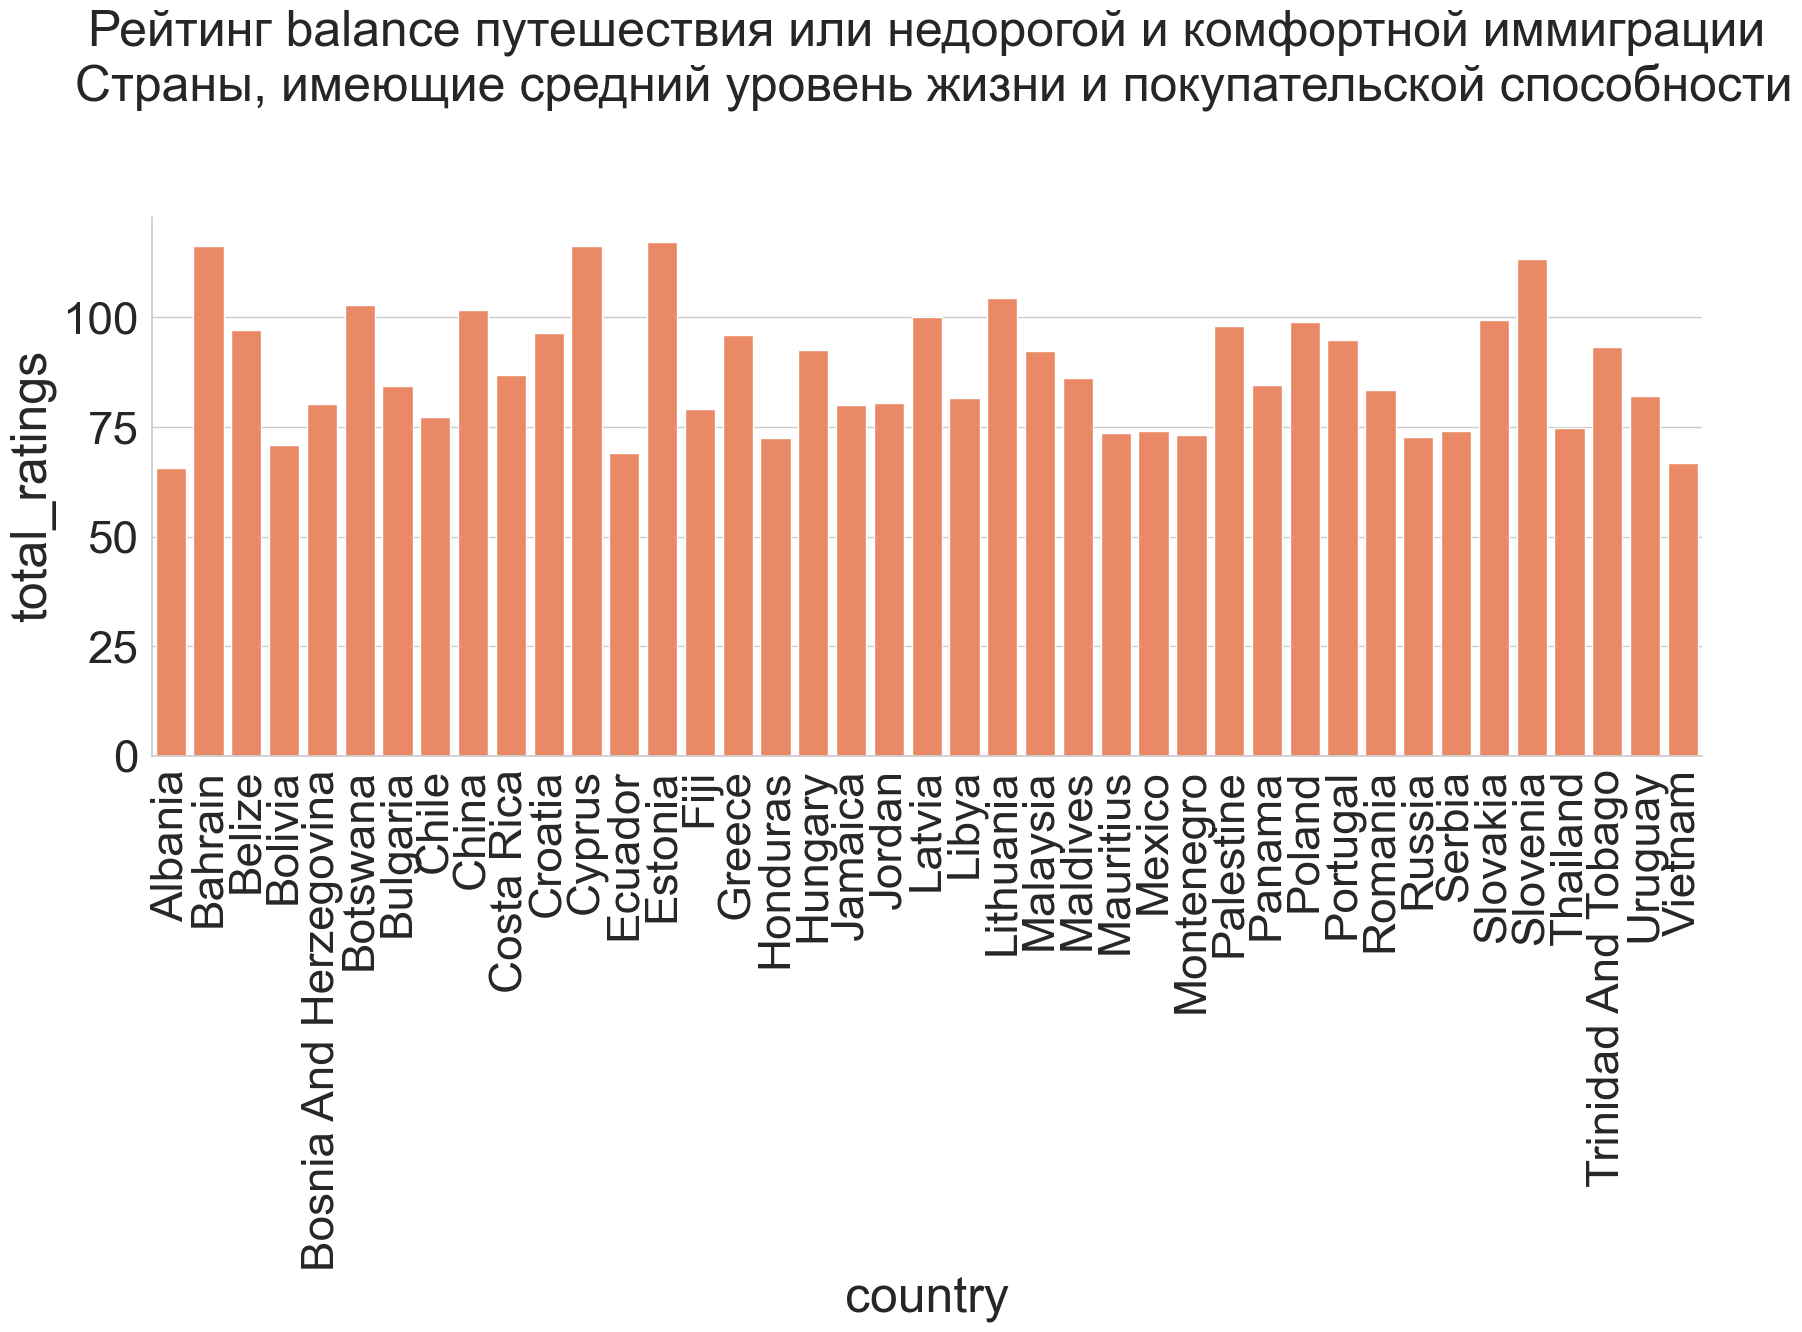

In [41]:
sns.barplot(data = immigration, x = 'country', y = 'total_ratings', color = 'coral')
plt.xticks(rotation = 90)
plt.title('Рейтинг balance путешествия или недорогой и комфортной иммиграции\n Страны, имеющие средний уровень жизни и покупательской способности\n\n')
sns.despine()

**Вывод: Рейтинг balance путешествия (средний индекс уровня жизни в государстве и средние индексы арендной платы и цен в ресторанах)**

**10.Рейтинг "путешественника, которому ничего не страшно и нужно дешево" (с учетом индекса арендной платы и цен в ресторанах)**

In [42]:
df = data
df = df[['country','rent_index','restaurant_price_index']]
df['total_price'] = df['rent_index'] + df['restaurant_price_index']
df = df.sort_values(by = 'total_price').head(20)
df

C:\Users\1612918\AppData\Local\Temp\ipykernel_12576\1677782549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_price'] = df['rent_index'] + df['restaurant_price_index']


,country,rent_index,restaurant_price_index,total_price
1,Afghanistan,2.72,12.41,15.13
3,Algeria,4.59,14.48,19.07
93,Pakistan,3.91,15.54,19.45
126,Tunisia,5.32,15.96,21.28
53,India,5.30,17.56,22.86
85,Nepal,3.96,20.41,24.37
127,Turkey,6.63,18.40,25.03
117,Sri Lanka,8.23,17.27,25.50
11,Bangladesh,4.42,21.70,26.12
90,North Macedonia,6.06,21.02,27.08


<Figure size 4000x4000 with 0 Axes>

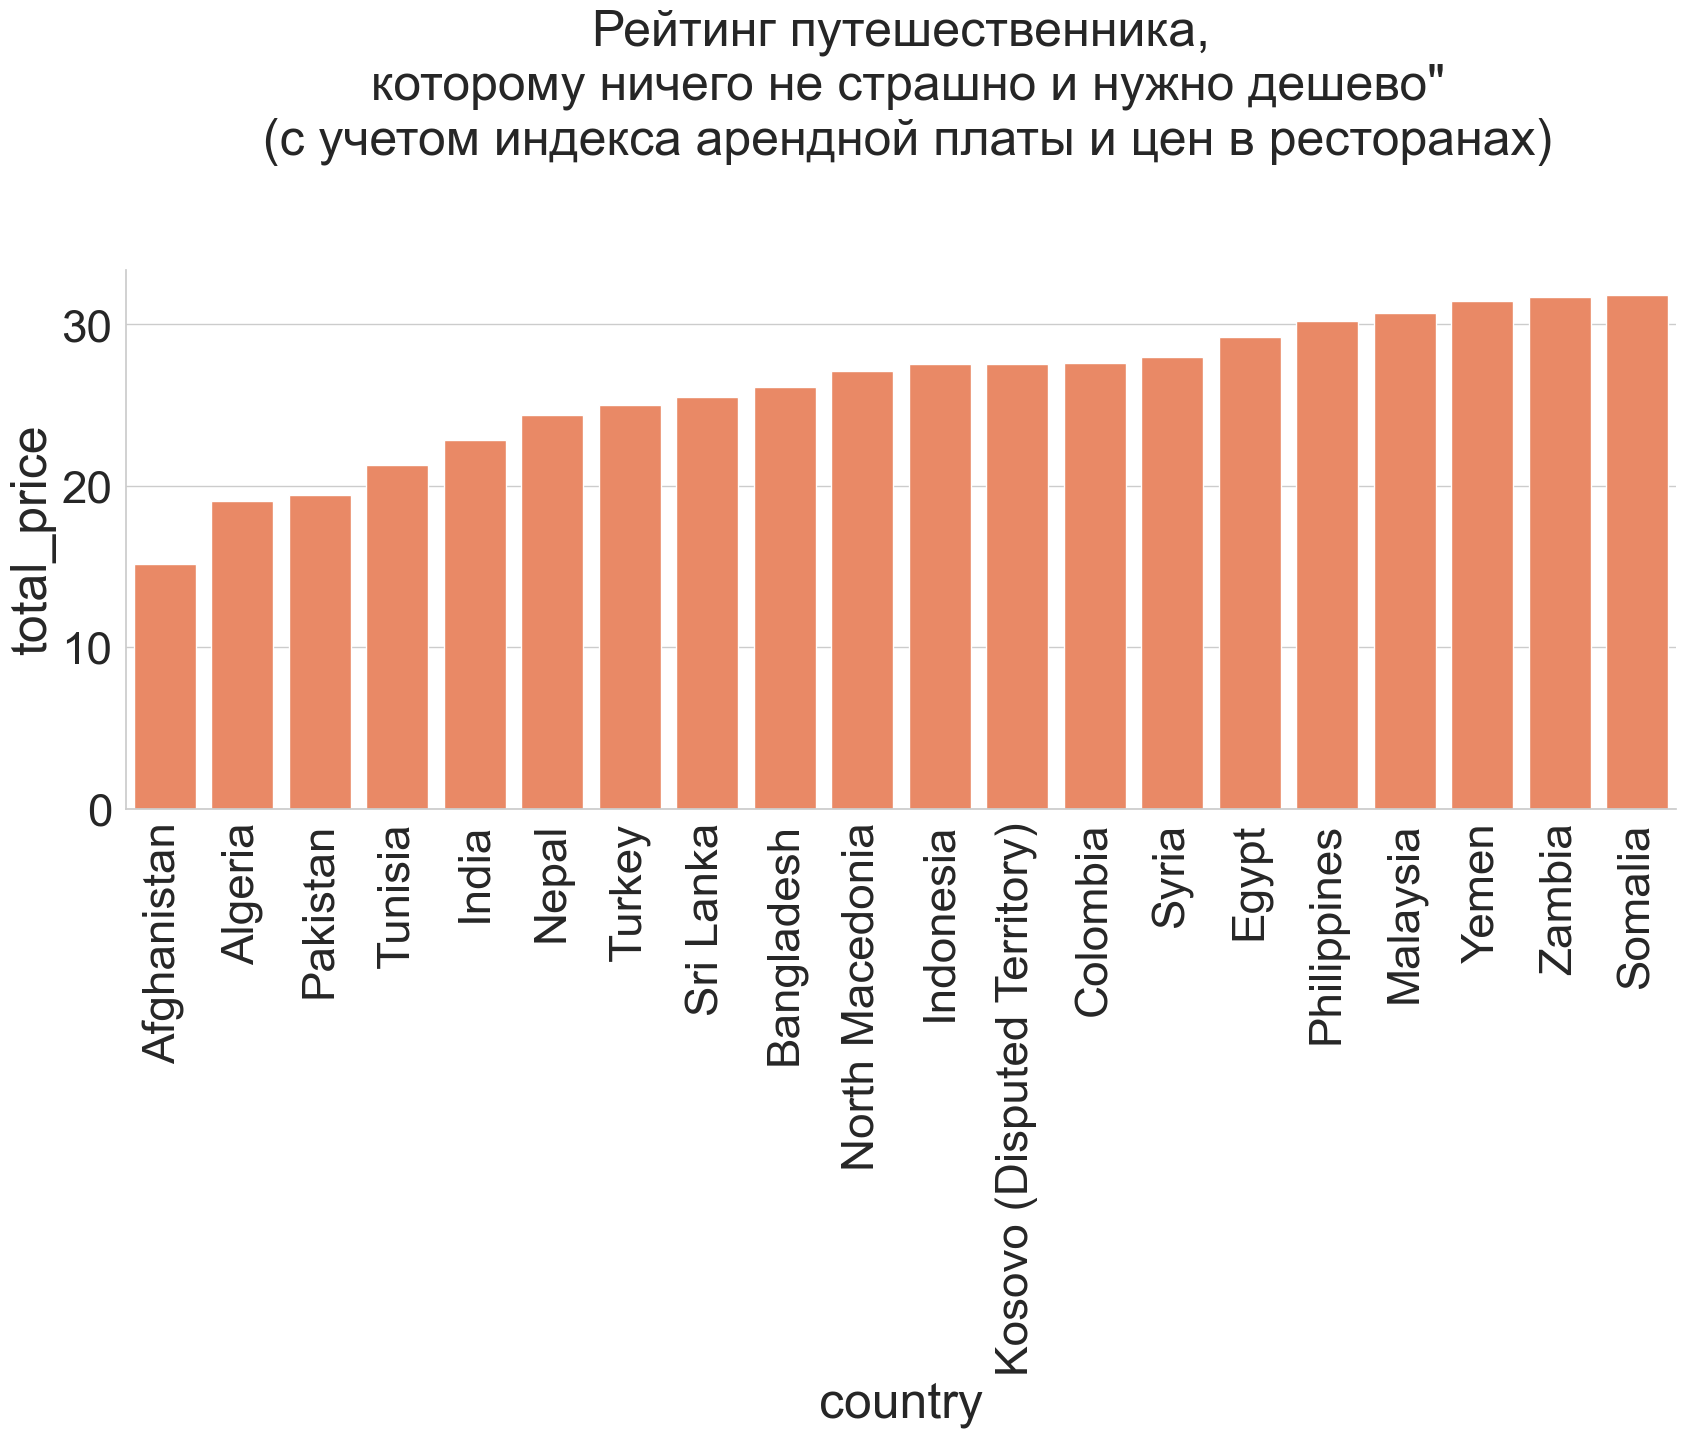

<Figure size 4000x4000 with 0 Axes>

In [43]:
sns.barplot(data = df, x = 'country', y = 'total_price', color = 'coral')
plt.xticks(rotation = 90)
plt.title('Рейтинг путешественника,\n которому ничего не страшно и нужно дешево"\n (с учетом индекса арендной платы и цен в ресторанах)\n\n')
sns.despine()
plt.figure(figsize=(40,40))

12. Если углубляться, можно рассмотреть другие коэффициенты корреляции. Чем ближе он будет к 1, тем теснее будет связь.
Но в рамках данного проекта мы не имеем такой цели, поэтому можно просто вскользь взглянуть на данные.

(array([-100.,    0.,  100.,  200.]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

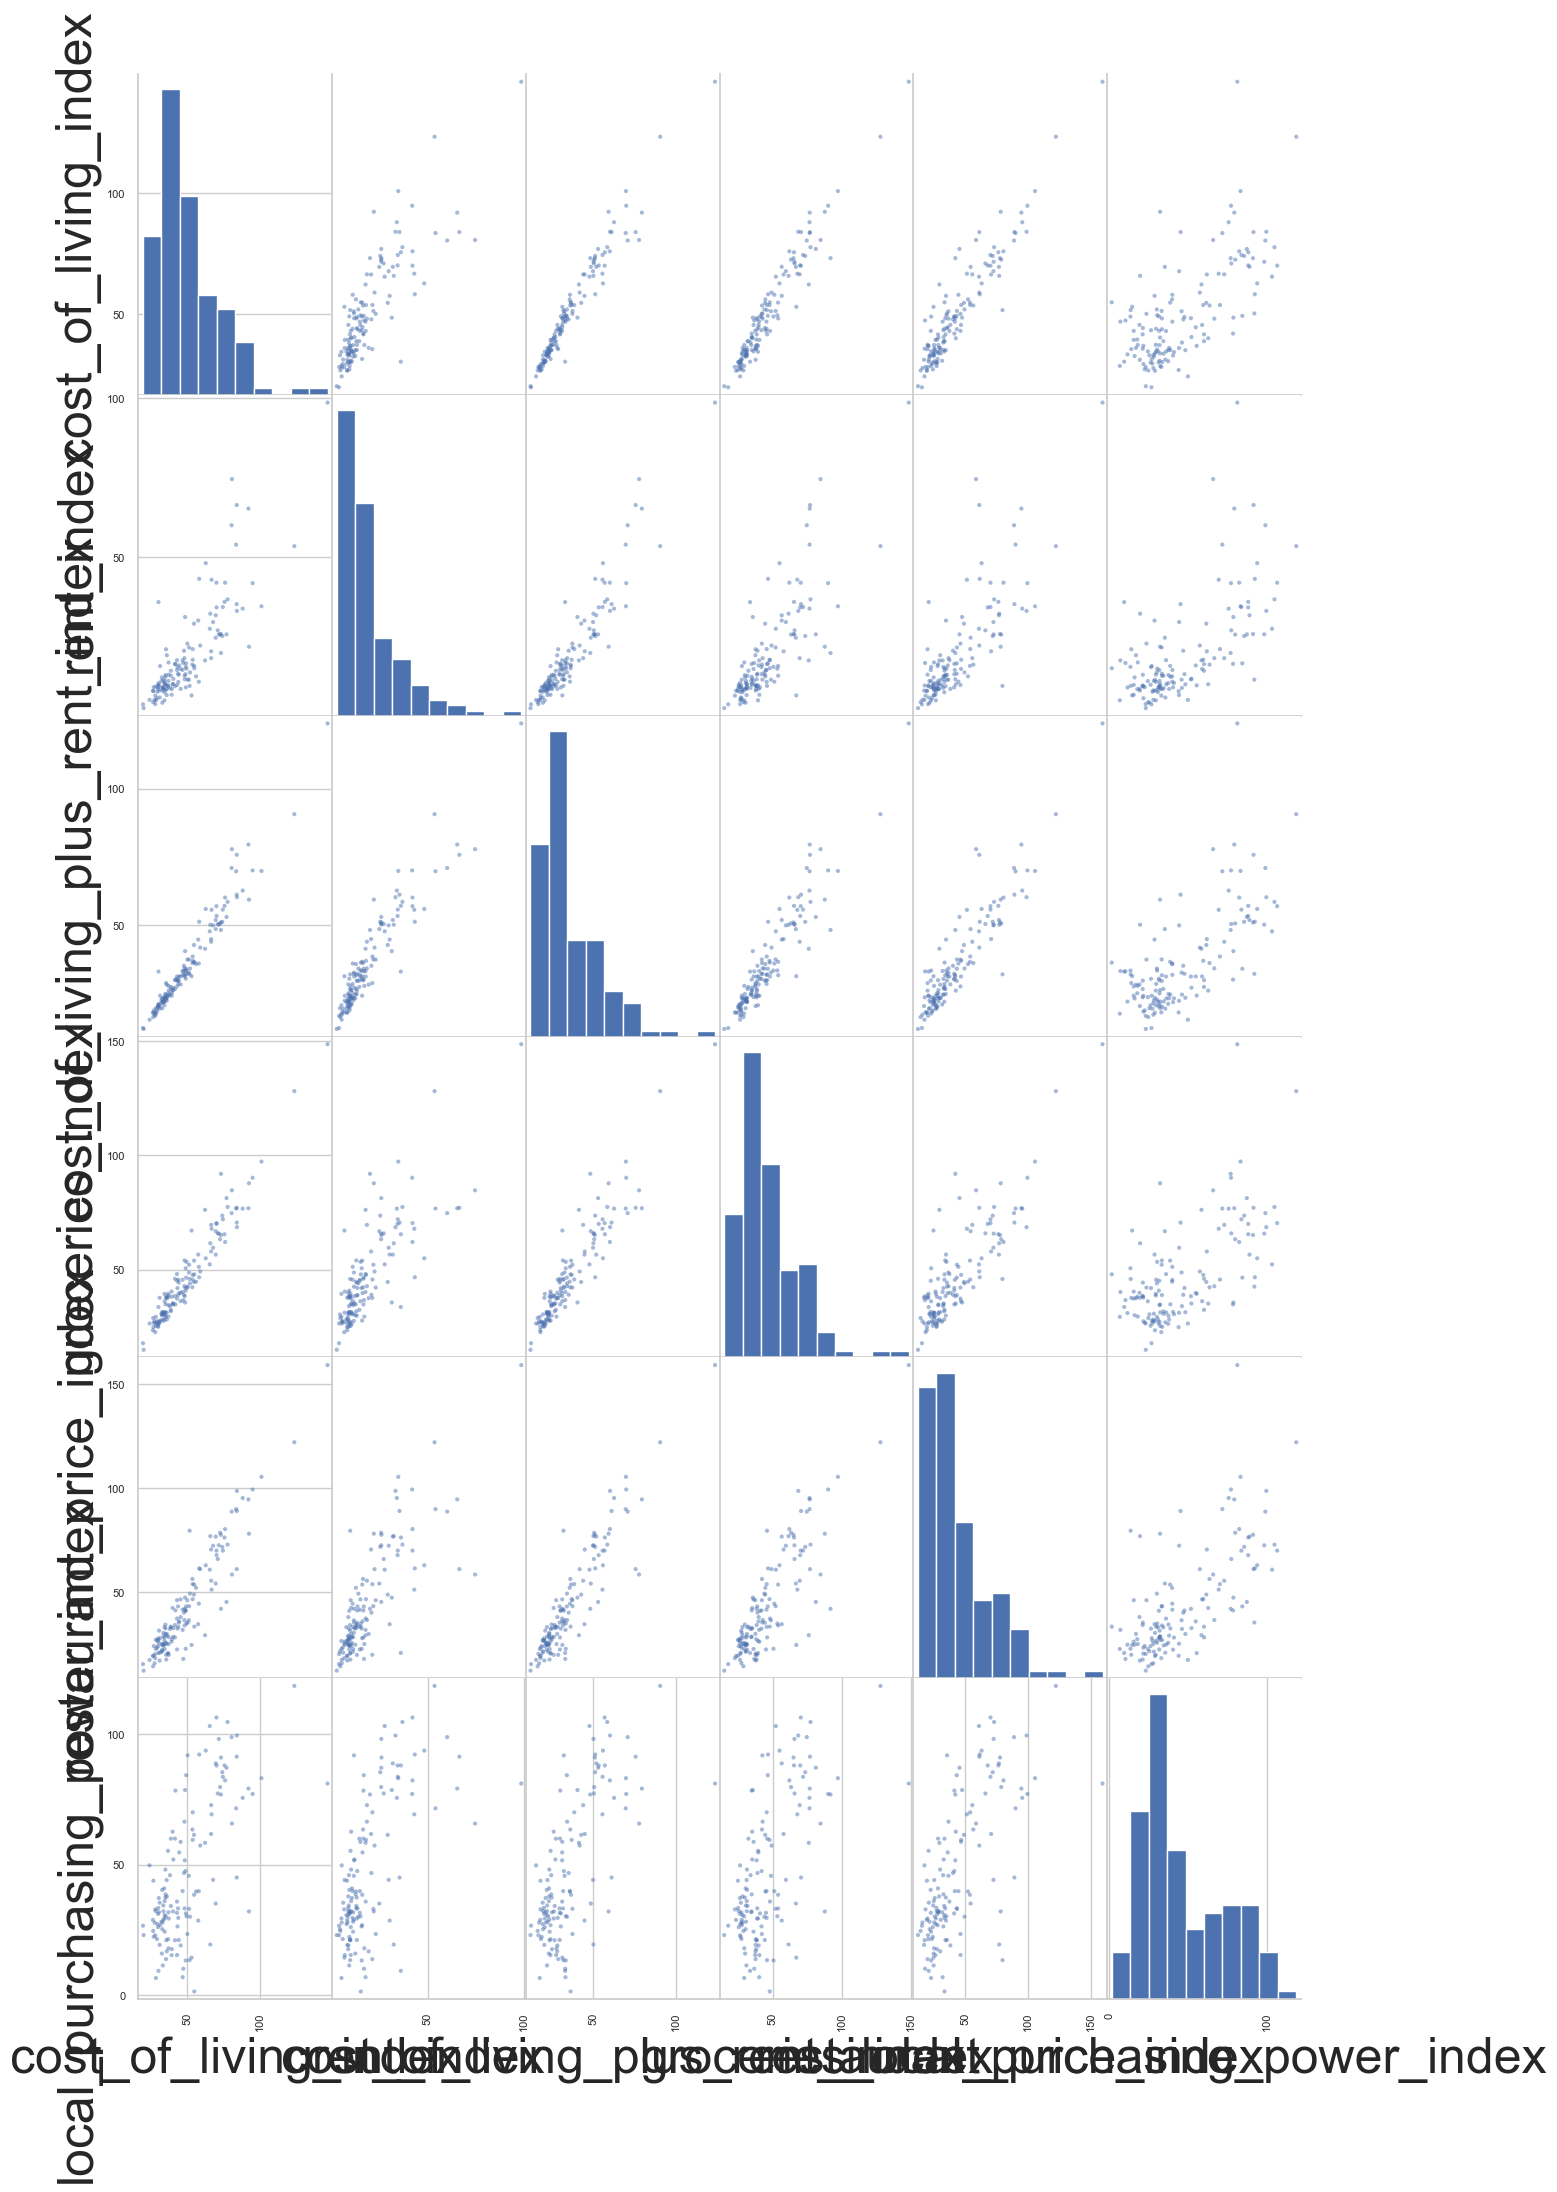

In [46]:
pd.plotting.scatter_matrix(data, figsize=(15,25))
sns.despine()
plt.xticks(rotation = 90)

In [45]:
data.corr()

,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
cost_of_living_index,1.000000,0.838079,0.974752,0.965435,0.934505,0.687244
rent_index,0.838079,1.000000,0.938735,0.799108,0.800190,0.638075
cost_of_living_plus_rent_index,0.974752,0.938735,1.000000,0.936967,0.917878,0.695304
groceries_index,0.965435,0.799108,0.936967,1.000000,0.851450,0.626534
restaurant_price_index,0.934505,0.800190,0.917878,0.851450,1.000000,0.690833
local_purchasing_power_index,0.687244,0.638075,0.695304,0.626534,0.690833,1.000000
